In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("./csvfiles/mldata/Classified Data.csv", index_col=0)
df.head(3)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


## 타겟 Y값/ 변수 X값 지정

In [7]:
x = df.drop('TARGET CLASS', axis =1)
y = df['TARGET CLASS']

# train_test_split 데이터 분할

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=111)

# KNeighborsClassifier 알고리즘선택, 객체 생성, 학습, 예측

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [11]:
predictions = knn.predict(x_test)
predictions

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0], dtype=int64)

# classification_report()/// .score() 예측률 평가

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [13]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        97
           1       0.93      0.91      0.92       103

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [14]:
knn.score(x_test, y_test)

0.92

# 최적의 n_neighbors를 찾기 위한 탐색 for문

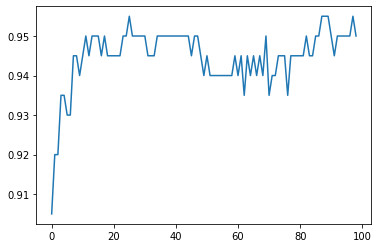

In [15]:
accuracys = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    acc = accuracy_score(y_test, predictions) #knn.score(x_test, y_test)
    accuracys.append(acc)
plt.plot(range(len(accuracys)), accuracys)

In [16]:
accuracy_score(y_test, predictions)

0.95

In [17]:
knn.score(x_test, y_test)

0.95

# 찾아낸 n_neighbors를 입력하여 예측/평가

In [18]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
knn.score(x_test, y_test)

0.95

In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95        97
           1       0.92      0.99      0.95       103

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [20]:
knn.score(x_test, y_test)

0.95

# 모델의 성능향상을 위한 데이터표준화

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [22]:
sc.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
x = sc.transform(x)
# sc.fit_transform(x)을 사용하면 fit과 transform을 한번에 할 수 있다.

In [24]:
sc.fit_transform(x)

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

# 데이터 분할/최적화 재실행

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

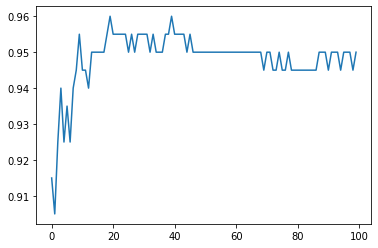

In [104]:
accuracys = []
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    acc = accuracy_score(y_test, predictions) #knn.score(x_test, y_test)
    accuracys.append(acc)
plt.plot(range(len(accuracys)), accuracys)

# 데이터재학습 후 평가

In [97]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
knn.score(x_test, y_test)

0.96

In [98]:
accuracy_score(y_test, predictions)

0.96